In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from tensorflow.keras.utils import to_categorical

IRIS data
=======================
1. 상관관계, heatmap
2. 정규화
3. train test
4. 학습(딥러닝, validation)
5. train:정확도,f1, confusion matrix
   test:정확도,f1, confusion matrix

In [2]:
iris = load_iris( as_frame=True)
iris['frame']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
print( iris['DESCR'] )

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

1.1 상관관계

In [4]:
df=iris['frame']
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


1.2 Heat map

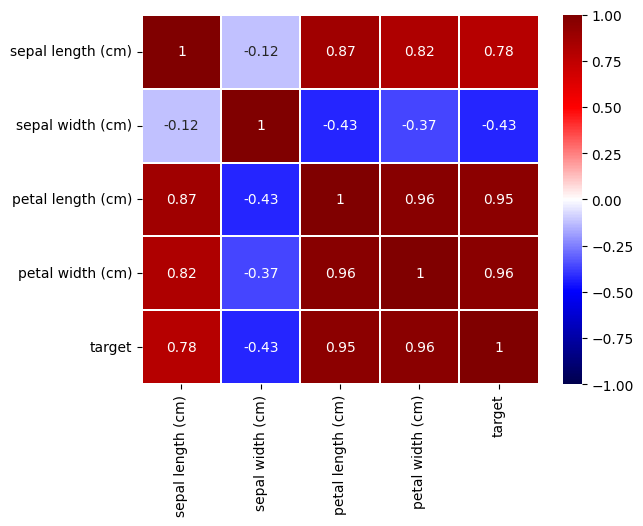

In [5]:
#plt.figure( figsize=(10,6))
sb.heatmap( df.corr() , annot=True,  vmin=-1, vmax=1,
           linewidths=0.2, cmap='seismic')
plt.show()

2. 정규화

In [6]:
x_data = df.iloc[:, :-1].values
y_data = df.iloc[:, [-1]].values

In [7]:
print(x_data.shape)
print(y_data.shape)

(150, 4)
(150, 1)


In [11]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )
x_dataN

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:
y_one = to_categorical( y_data )

3. train_test_split

In [13]:
x_trainN, x_testN, y_train, y_test = train_test_split( x_dataN, y_one, 
                                            test_size=0.3, stratify=y_one)

In [14]:
print(x_trainN.shape)
print(y_train.shape)
print(x_testN.shape)
print(y_test.shape)

(105, 4)
(105, 3)
(45, 4)
(45, 3)


4. train, test : accuracy_score, f1_score, confusion_matrix

In [18]:
dense1 = Dense( units=64, input_dim=4, activation='relu')
dense2 = Dense( units=32, input_dim=64, activation='relu')
dense3 = Dense( units=3, input_dim=32, activation='softmax')
model = Sequential( [dense1, dense2, dense3])
model.compile( loss='categorical_crossentropy', optimizer=Adam(0.1),
              metrics=['acc'] )
h = model.fit( x_trainN, y_train, epochs= 500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.4054 - loss: 1.1152 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5004 - loss: 0.7180
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7263 - loss: 0.4009  
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8609 - loss: 0.3604  
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8409 - loss: 0.3618 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8322 - loss: 0.3344
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8484 - loss: 0.3411
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9354 - loss: 0.2564
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8425 - loss: 0.2839
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9088 - loss: 0.2009 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9674 - loss: 0.1530
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9310 - loss: 0.12489
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

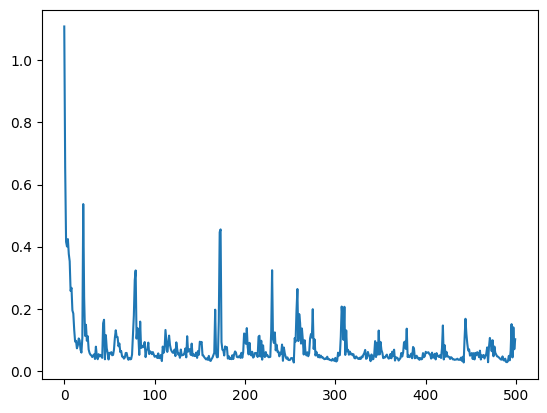

In [19]:
plt.plot( h.history['loss'])
plt.show()

In [20]:
#predT = (model.predict( x_trainN) > 0.5) +0
predT=model.predict( x_trainN ).argmax(axis=1)
predT


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2,
       0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0])

In [22]:
y_train.argmax(axis=1)

array([0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2,
       0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0])

### train 정확도, f1_score, confusion_matrix

In [23]:
accuracy_score( y_train.argmax(axis=1), predT )

0.9714285714285714

In [25]:
f1_score( y_train.argmax(axis=1), predT , average='macro')

np.float64(0.9713759967286854)

In [26]:
confusion_matrix(  y_train.argmax(axis=1), predT )

array([[35,  0,  0],
       [ 0, 32,  3],
       [ 0,  0, 35]])

### test 정확도, f1_score, confusion_matrix

In [27]:
predTest = model.predict( x_testN).argmax( axis=1)
predTest

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1])

In [28]:
accuracy_score(y_test.argmax(axis=1), predTest )

0.9555555555555556

In [29]:
f1_score(y_test.argmax(axis=1), predTest, average='macro' )

np.float64(0.9553571428571429)

In [30]:
confusion_matrix( y_test.argmax(axis=1), predTest )

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]])

5. test의 0행 에 대한 iris 종류 예측

In [32]:
model.predict( x_testN[0].reshape( 1,-1) ).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([2])

In [36]:
y_test[0].reshape( 1,-1).argmax(axis=1)

array([2])